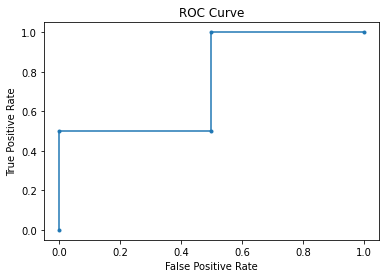

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

# Example probability outputs from the model and true labels
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


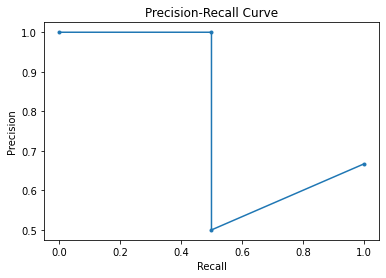

In [2]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


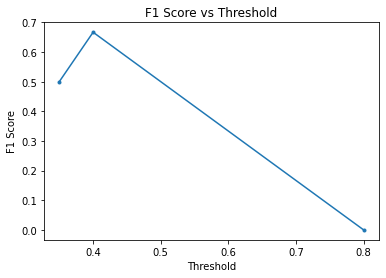

Optimal Threshold based on F1 Score: 0.4


In [1]:
from sklearn.metrics import roc_auc_score

# Example data
y_true = [0, 0, 1, 1]  # True binary labels
y_scores = [0.1, 0.4, 0.35, 0.8]  # Predicted scores

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)
print("AUC Score:", auc)


AUC Score: 0.75
